# Task 2

Link to the datasets: https://arielacil-my.sharepoint.com/:u:/g/personal/rand_ariel_ac_il/EbcKOLRNLExFvxcOCpESGLMBRlP1f5WhX9EIpZJ7qAXi9g?e=tAycKc

**Dataset_2** - A more advance version of the former dataset containing much more attacks and endpoint (almost double). The data is also more complex with a higher randomization mechanism.

```
Dataset 2 baseline score:

                  precision    recall  f1-score   support

    Benign          0.98455   0.99178   0.98815     20812
    Malware         0.88889   0.80851   0.84680      1692

    accuracy                            0.97800     22504
    macro avg       0.93672   0.90015   0.91747     22504
    weighted avg    0.97735   0.97800   0.97752     22504
```

# Cisco - Ariel University API Security Detection Challenge 2023
## Baseline code


### Imports and global settings

In [6]:
# Imports, settings and first dataset view
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.decomposition import TruncatedSVD

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as ps
import matplotlib.pyplot as plt
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.templates['plotly_dark'].layout.autosize = False
pio.templates['plotly_dark'].layout.width = 1_000
pio.templates['plotly_dark'].layout.height = 800

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import StackingClassifier

import pickle

# from ipywidgets import widgets

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 2  # Options are [1, 2, 3, 4]
test_type = 'label'  # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Shoe the first five lines of the dataframe to see if everything was read accordingly
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.Attack_Tag,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=w6oM9XV_jvWjuuVd3hLe3eSdXXPydbyfsLwTlj4Mc...,"Fri, 11 Nov 2022 03:12:09 GMT",GET,http://127.0.0.1:5000/static/download_txt/7115,,404 NOT FOUND,application/json,32,404,"{""error"": ""File not found""}",NaN,NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,same-origin,?1,document,['ck=c8uOUXcCTGAn3VPZ7KkmjeGl7T4m7z5hvteH_e4NP...,"Fri, 11 Nov 2022 03:01:18 GMT",GET,http://127.0.0.1:5000/about/random_page,,200 OK,text/html; charset=utf-8,1163,200,"<figure><img src=""https://img-c.udemycdn.com/r...",NaN,NaN,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,websocket,?1,document,['ck=RKquq_BCt65ARAQ2BjFcYW58e4Hr_JMvmHA71wfu8...,"Fri, 11 Nov 2022 03:01:17 GMT",GET,http://127.0.0.1:5000/categories/check/all,,200 OK,application/json,1112,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",NaN,NaN,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=RhHVh7pmM73Qp434tecicojVb27D_OtIVbYPqWaqj...,"Fri, 11 Nov 2022 02:40:48 GMT",GET,http://127.0.0.1:5000/states/5911,,404 NOT FOUND,application/json,33,404,"{""error"": ""State not found""}",NaN,NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=DBFNGnjseloXLj_cxqJe3QTz-J1XS4kaCpMWDl60G...,"Fri, 11 Nov 2022 03:05:42 GMT",GET,http://127.0.0.1:5000/orders/get/ship_via/10642,,404 NOT FOUND,application/json,36,404,"{""error"": ""Ship VIA not found""}",NaN,NaN,NaN,NaN,NaN


### Basic dataset label arrangements

In [8]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns
# You can use this snippet to run your own lambda on any data with the apply() method


def categorize(row):
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'


df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=w6oM9XV_jvWjuuVd3hLe3eSdXXPydbyfsLwTlj4Mc...,"Fri, 11 Nov 2022 03:12:09 GMT",GET,http://127.0.0.1:5000/static/download_txt/7115,,404 NOT FOUND,application/json,32,404,"{""error"": ""File not found""}",NaN,NaN,NaN,NaN,Benign,Benign
1,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,same-origin,?1,document,['ck=c8uOUXcCTGAn3VPZ7KkmjeGl7T4m7z5hvteH_e4NP...,"Fri, 11 Nov 2022 03:01:18 GMT",GET,http://127.0.0.1:5000/about/random_page,,200 OK,text/html; charset=utf-8,1163,200,"<figure><img src=""https://img-c.udemycdn.com/r...",NaN,NaN,NaN,NaN,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,websocket,?1,document,['ck=RKquq_BCt65ARAQ2BjFcYW58e4Hr_JMvmHA71wfu8...,"Fri, 11 Nov 2022 03:01:17 GMT",GET,http://127.0.0.1:5000/categories/check/all,,200 OK,application/json,1112,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",NaN,NaN,NaN,NaN,Benign,Benign
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=RhHVh7pmM73Qp434tecicojVb27D_OtIVbYPqWaqj...,"Fri, 11 Nov 2022 02:40:48 GMT",GET,http://127.0.0.1:5000/states/5911,,404 NOT FOUND,application/json,33,404,"{""error"": ""State not found""}",NaN,NaN,NaN,NaN,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=DBFNGnjseloXLj_cxqJe3QTz-J1XS4kaCpMWDl60G...,"Fri, 11 Nov 2022 03:05:42 GMT",GET,http://127.0.0.1:5000/orders/get/ship_via/10642,,404 NOT FOUND,application/json,36,404,"{""error"": ""Ship VIA not found""}",NaN,NaN,NaN,NaN,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127495,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,websocket,?1,document,['ck=ubWnuAa4wIHnDTz0Su8AYWJAM7fUMCps6AxyNzFok...,"Fri, 11 Nov 2022 02:57:49 GMT",GET,http://127.0.0.1:5000/orders/get/employee_id/5482,,404 NOT FOUND,application/json,39,404,"{""error"": ""Employee ID not found""}",NaN,NaN,NaN,NaN,Benign,Benign
127496,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,de,none,websocket,?1,document,['ck=SkLWkaUE83sP38c3kf-XYBCKlSlSmBTQSEJw6EaMg...,"Fri, 11 Nov 2022 02:56:21 GMT",GET,http://127.0.0.1:5000/post/new/,,200 OK,text/html; charset=utf-8,70,200,<form method='POST'><input name='message'><inp...,NaN,NaN,NaN,NaN,Benign,Benign
127497,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,websocket,?1,document,['ck=giYaDJkC2Oa-rCmlAvYglQzy_Em-YHTv_5aOjposX...,"Fri, 11 Nov 2022 02:49:37 GMT",GET,http://127.0.0.1:5000/post/new/,,200 OK,text/html; charset=utf-8,70,200,<form method='POST'><input name='message'><inp...,NaN,NaN,NaN,NaN,Benign,Benign
127498,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de-CH,none,websocket,?1,document,['ck=VzOU9Ac91LxJ8UAvQ8Wt3c5Ua-30j4s9kcdTKrwCw...,"Fri,

In [9]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = df[column].fillna('None')

# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()

df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=w6oM9XV_jvWjuuVd3hLe3eSdXXPydbyfsLwTlj4Mc...,"Fri, 11 Nov 2022 03:12:09 GMT",GET,http://127.0.0.1:5000/static/download_txt/7115,,404 NOT FOUND,application/json,32,404,"{""error"": ""File not found""}",None,None,None,None,Benign,Benign
1,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,same-origin,?1,document,['ck=c8uOUXcCTGAn3VPZ7KkmjeGl7T4m7z5hvteH_e4NP...,"Fri, 11 Nov 2022 03:01:18 GMT",GET,http://127.0.0.1:5000/about/random_page,,200 OK,text/html; charset=utf-8,1163,200,"<figure><img src=""https://img-c.udemycdn.com/r...",None,None,None,None,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,websocket,?1,document,['ck=RKquq_BCt65ARAQ2BjFcYW58e4Hr_JMvmHA71wfu8...,"Fri, 11 Nov 2022 03:01:17 GMT",GET,http://127.0.0.1:5000/categories/check/all,,200 OK,application/json,1112,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",None,None,None,None,Benign,Benign
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=RhHVh7pmM73Qp434tecicojVb27D_OtIVbYPqWaqj...,"Fri, 11 Nov 2022 02:40:48 GMT",GET,http://127.0.0.1:5000/states/5911,,404 NOT FOUND,application/json,33,404,"{""error"": ""State not found""}",None,None,None,None,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=DBFNGnjseloXLj_cxqJe3QTz-J1XS4kaCpMWDl60G...,"Fri, 11 Nov 2022 03:05:42 GMT",GET,http://127.0.0.1:5000/orders/get/ship_via/10642,,404 NOT FOUND,application/json,36,404,"{""error"": ""Ship VIA not found""}",None,None,None,None,Benign,Benign


In [10]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer

# On these headers we will run a "simple" BOW
SIMPLE_HEADERS = ['request.headers.Accept-Encoding',
                  'request.headers.Connection',
                  'request.headers.Host',
                  'request.headers.Accept',
                  'request.method',
                  'request.headers.Accept-Language',
                  'request.headers.Sec-Fetch-Site',
                  'request.headers.Sec-Fetch-Mode',
                  'request.headers.Sec-Fetch-Dest',
                  'request.headers.Sec-Fetch-User',
                  'response.status',
                  ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = ['request.headers.User-Agent',
                   'request.headers.Set-Cookie',
                   'request.headers.Date',
                   'request.url',
                   'response.headers.Content-Type',
                   'response.body',
                   'response.headers.Location',
                   'request.headers.Content-Length',
                   'request.headers.Cookie',
                   'response.headers.Set-Cookie'
                   ]

COLUMNS_TO_REMOVE = ['request.body',
                     'response.headers.Content-Length',
                     'request.headers.Date']

# This is our main preprocessing function that will iterate over all of the chosen
# columns and run some feature extraction models


def vectorize_df(df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS:
        df[column] = le.fit_transform(df[column])

    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS:
        newHVec = h_vec.fit_transform(df[column])
        df[column] = newHVec.todense()

    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE:
        df.drop(column, axis=1, inplace=True)
    return df


df = vectorize_df(df)
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.method,request.url,response.status,response.headers.Content-Type,response.status_code,response.body,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,0,-0.755929,0,0,0,1,0,0,0,0,-0.646997,0,0.408248,4,-1.0,404,0.408248,-1.0,-1.0,-1.0,-1.0,Benign,Benign
1,0,0.000000,0,0,0,3,0,0,0,0,-0.480384,0,0.000000,0,-1.0,200,0.956183,-1.0,-1.0,-1.0,-1.0,Benign,Benign
2,0,-0.408248,0,0,0,1,0,1,0,0,0.426401,0,0.707107,0,-1.0,200,-0.255551,-1.0,-1.0,-1.0,-1.0,Benign,Benign
3,0,0.666667,0,0,0,2,0,0,0,0,-0.593391,0,0.577350,4,-1.0,404,0.408248,-1.0,-1.0,-1.0,-1.0,Benign,Benign
4,0,-0.471405,0,0,0,3,0,1,0,0,-0.652753,0,0.377964,4,-1.0,404,0.894427,-1.0,-1.0,-1.0,-1.0,Benign,Benign


In [11]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127500 entries, 0 to 127499
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   request.headers.Host             127500 non-null  int64  
 1   request.headers.User-Agent       127500 non-null  float64
 2   request.headers.Accept-Encoding  127500 non-null  int64  
 3   request.headers.Accept           127500 non-null  int64  
 4   request.headers.Connection       127500 non-null  int64  
 5   request.headers.Accept-Language  127500 non-null  int64  
 6   request.headers.Sec-Fetch-Site   127500 non-null  int64  
 7   request.headers.Sec-Fetch-Mode   127500 non-null  int64  
 8   request.headers.Sec-Fetch-User   127500 non-null  int64  
 9   request.headers.Sec-Fetch-Dest   127500 non-null  int64  
 10  request.headers.Set-Cookie       127500 non-null  float64
 11  request.method                   127500 non-null  int64  
 12  re

In [12]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.Host', 'request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Accept', 'request.headers.Connection', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Sec-Fetch-User', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.method', 'request.url', 'response.status', 'response.headers.Content-Type', 'response.status_code', 'response.body', 'response.headers.Location', 'request.headers.Cookie', 'request.headers.Content-Length', 'response.headers.Set-Cookie']


request.headers.Host                 int64
request.headers.User-Agent         float64
request.headers.Accept-Encoding      int64
request.headers.Accept               int64
request.headers.Connection           int64
request.headers.Accept-Language      int64
request.headers.Sec-Fetch-Site       int64
request.headers.Sec-Fetch-Mode       int64
request.headers.Sec-Fetch-User       int64
request.headers.Sec-Fetch-Dest       int64
request.headers.Set-Cookie         float64
request.method                       int64
request.url                        float64
response.status                      int64
response.headers.Content-Type      float64
response.status_code                 int64
response.body                      float64
response.headers.Location          float64
request.headers.Cookie             float64
request.headers.Content-Length     float64
response.headers.Set-Cookie        float64
attack_type                         object
label                               object
dtype: obje

In [13]:
# # Feature selection
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import StratifiedKFold

# # Split the data to train and test
# X_train, X_test, y_train, y_test = train_test_split(df[features_list], df[test_type], test_size=0.2, random_state=42)

# # Create the RFE object and compute a cross-validated score.
# # The "accuracy" scoring is proportional to the number of correct classifications
# rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(2), scoring='accuracy')
# rfecv.fit(X_train, y_train)

# print("Optimal number of features : %d" % rfecv.n_features_)
# print('Selected features: %s' % list(X_train.columns[rfecv.support_]))

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

In [14]:
ss = StandardScaler()

In [15]:
pca = PCA(n_components=2)

In [16]:
# x_after_pca_in_2D=pca.fit_transform(df[features_list].to_numpy())
x_after_pca_in_2D = pca.fit_transform(ss.fit_transform(df[features_list].to_numpy()))

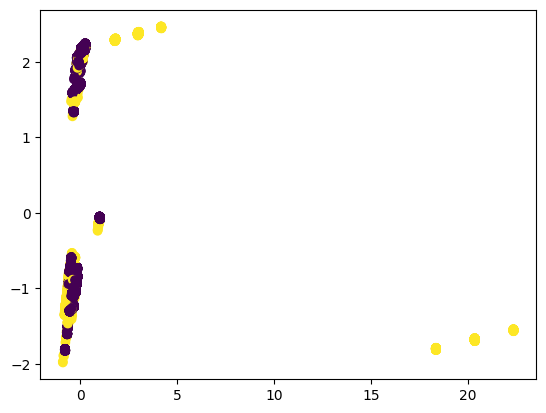

In [17]:
plt.scatter(x_after_pca_in_2D[:, 0], x_after_pca_in_2D[:, 1], c=df['label'].map({'Benign': 0, 'Malware': 1}))

In [18]:
pca = PCA()
pca.fit(ss.fit_transform(df[features_list].to_numpy()))

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
    range_y=(0.98, 1.02),
    title="SVD Explained Variance Ratio"
)

As we can see we can compress the data into 14 components without loosing any information.

## Train test split

In [19]:
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing

# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list].to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(104996, 21) (104996,)
(22504, 21) (22504,)


Counter({'Benign': 117914, 'Malware': 9586})

In [20]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [21]:
pca = PCA(14)
pca.fit(X_train)
# x_train_pca = pca.transform(X_train)
x_train_pca = pca.transform(X_train)

In [22]:
# x_test_pca = pca.transform(X_test)
x_test_pca = pca.transform(X_test)

In [23]:
def create_grid_search(model, params):
    return GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, verbose=3, cv=3, scoring='accuracy', return_train_score=True)

In [24]:
# https://plotly.com/python/parallel-categories-diagram/

def plot_grid_search_results(results):

    df = pd.DataFrame(results)
    # Build parcats dimensions
    categorical_dimensions = [c for c in df.columns if "param_" in c]

    dimensions = [dict(values=df[label], label=label)for label in categorical_dimensions]

    # Build colorscale
    color = np.zeros(len(df), dtype='uint8')
    colorscale = [[0, 'gray'], [1, 'blue']]

    # Build figure as FigureWidget
    fig = go.FigureWidget(data=[go.Scatter(x=df['std_test_score'], y=df['mean_test_score'], marker={'color': 'gray'}, mode='markers', selected={'marker': {'color': 'blue'}}, unselected={'marker': {'opacity': 0.3}}), go.Parcats(domain={'y': [0, 0.4]}, dimensions=dimensions,line={'colorscale': colorscale, 'cmin': 0,'cmax': 1, 'color': color, 'shape': 'hspline'})])

    fig.update_layout(
        height=800, xaxis={'title': 'STD Score'},
        yaxis={'title': 'Mean Score', 'domain': [0.6, 1]},
        dragmode='lasso', hovermode='closest')

    # Update color callback
    def update_color(trace, points, state):
        # Update scatter selection
        fig.data[0].selectedpoints = points.point_inds

        # Update parcats colors
        new_color = np.zeros(len(df), dtype='uint8')
        new_color[points.point_inds] = 1
        fig.data[1].line.color = new_color

    # Register callback on scatter selection...
    fig.data[0].on_selection(update_color)
    # and parcats click
    fig.data[1].on_click(update_color)

    return fig

## Model choosing and fitting

In [ ]:
# Random forest is an ensemble learning method that uses multiple decision trees to make predictions.
# It is a robust and flexible model that can handle high-dimensional and complex data,
# making it a good choice for API classification tasks.

rf = RandomForestClassifier()
rf_param = {
    "n_estimators": [50, 100, 150, 200, 250, 300],
    "criterion": ["gini", "entropy"],
}
rf_gcv = create_grid_search(rf, rf_param)

In [ ]:
rf_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
# plot_grid_search_results(rf_gcv.cv_results_)

In [ ]:
clf = rf_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/rf"+str(dataset_number)+"_model.sav"
pickle.dump(clf, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.98413   0.99198   0.98804     20812
     Malware    0.89056   0.80319   0.84462      1692

    accuracy                        0.97778     22504
   macro avg    0.93734   0.89758   0.91633     22504
weighted avg    0.97709   0.97778   0.97725     22504



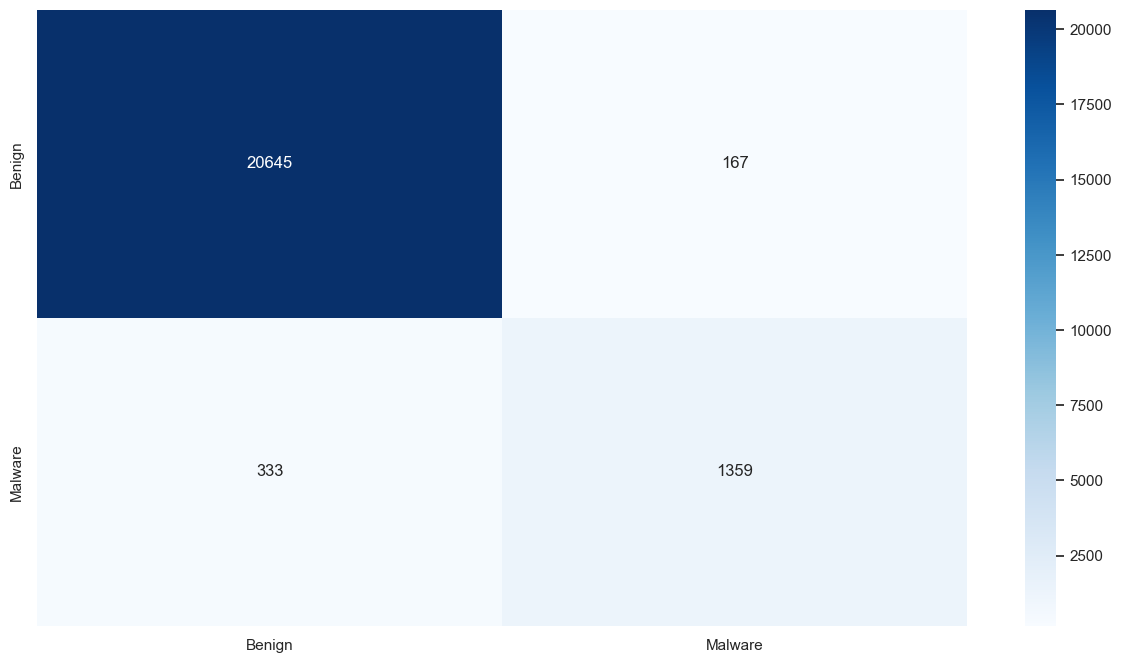

In [ ]:
show(clf)

In [ ]:
# Support vector machines are a popular choice for classification tasks, including API classification.
# They work by finding the hyperplane in a high-dimensional space that maximally
# separates different classes of data points.

svc = SVC(cache_size=500)
svc_param = {
    "C": [1, 2, 3],
    "kernel": ["poly", "rbf"],
    "probability": [True],
}
svc_gcv = create_grid_search(svc, svc_param)

In [ ]:
svc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=SVC(cache_size=500), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'kernel': ['poly', 'rbf'],
                         'probability': [True]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
# plot_grid_search_results(svc_gcv.cv_results_)

In [ ]:
svc = svc_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/svc"+str(dataset_number)+"_model.sav"
pickle.dump(svc, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.96179   0.99899   0.98004     20812
     Malware    0.97632   0.51182   0.67158      1692

    accuracy                        0.96236     22504
   macro avg    0.96906   0.75541   0.82581     22504
weighted avg    0.96288   0.96236   0.95685     22504



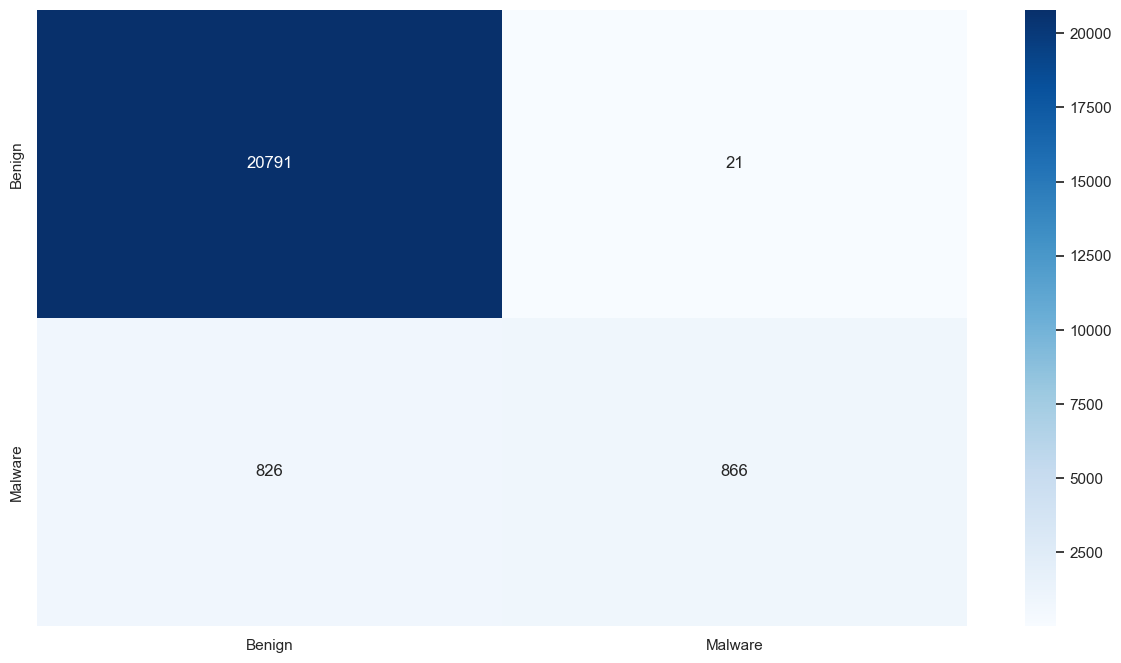

In [ ]:
show(svc)

In [ ]:
# Logistic regression is a simple yet effective linear model for classification tasks.
# It is particularly useful for predicting binary outcomes
# (e.g., malicious vs benign) and is often used as a baseline
# model for comparison with more complex models.

lr = LogisticRegression()
lr_param = {
    "C": [1, 2, 3],
    "penalty": ["l2"],
}
lr_gcv = create_grid_search(lr, lr_param)

In [ ]:
lr_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'penalty': ['l2']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
# plot_grid_search_results(lr_gcv.cv_results_)

In [ ]:
lr = lr_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/lrh"+str(dataset_number)+"_model.sav"
pickle.dump(lr, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.95877   1.00000   0.97895     20812
     Malware    1.00000   0.47104   0.64042      1692

    accuracy                        0.96023     22504
   macro avg    0.97938   0.73552   0.80968     22504
weighted avg    0.96187   0.96023   0.95350     22504



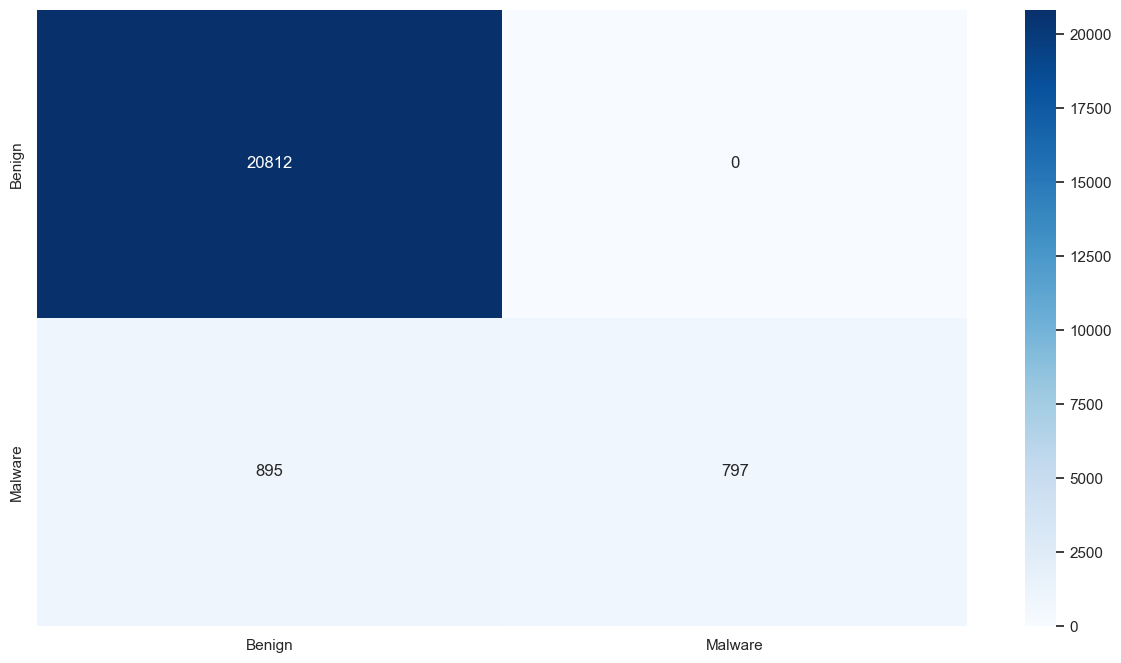

In [ ]:
show(lr)

In [ ]:
# KNN is a simple yet effective classification algorithm that works by finding the k nearest neighbors of a data point.
# It is a non-parametric model that does not make any assumptions about the underlying data distribution.

knn = KNeighborsClassifier()
knn_param = {
    "n_neighbors": [3, 5, 7, 9, 11, 13, 15],
    "weights": ["uniform", "distance"],
}
knn_gcv = create_grid_search(knn, knn_param)

In [ ]:
knn_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
# plot_grid_search_results(knn_gcv.cv_results_)

In [ ]:
knn = knn_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/knn"+str(dataset_number)+"_model.sav"
pickle.dump(knn, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.97245   0.99058   0.98143     20812
     Malware    0.84969   0.65485   0.73965      1692

    accuracy                        0.96534     22504
   macro avg    0.91107   0.82271   0.86054     22504
weighted avg    0.96322   0.96534   0.96326     22504



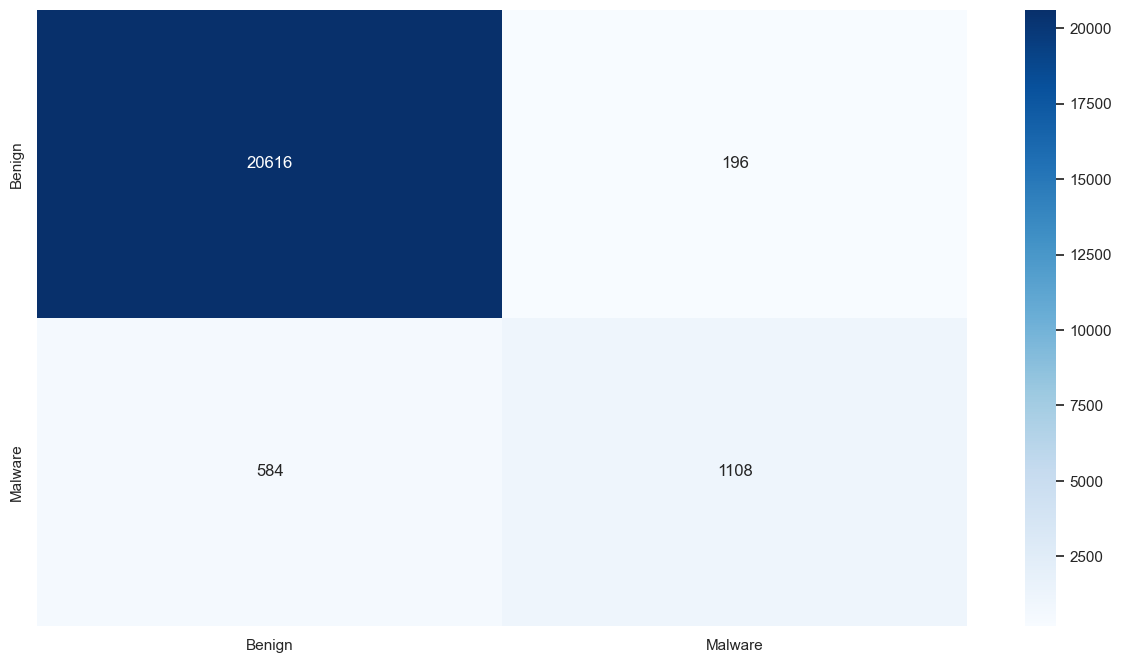

In [ ]:
show(knn)

In [ ]:
# Decision trees are a popular choice for classification tasks.
# They work by recursively partitioning the feature space into smaller and smaller regions,
# until each region contains only a single class of data points.

dt = DecisionTreeClassifier()
dt_param = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, 11, 13, 15],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
}
dt_gcv = create_grid_search(dt, dt_param)

In [ ]:
dt_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 126 candidates, totalling 378 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
# plot_grid_search_results(dt_gcv.cv_results_)

In [ ]:
dt = dt_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/dt"+str(dataset_number)+"_model.sav"
pickle.dump(dt, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.98044   0.99476   0.98755     20812
     Malware    0.92147   0.75591   0.83052      1692

    accuracy                        0.97680     22504
   macro avg    0.95096   0.87534   0.90903     22504
weighted avg    0.97601   0.97680   0.97574     22504



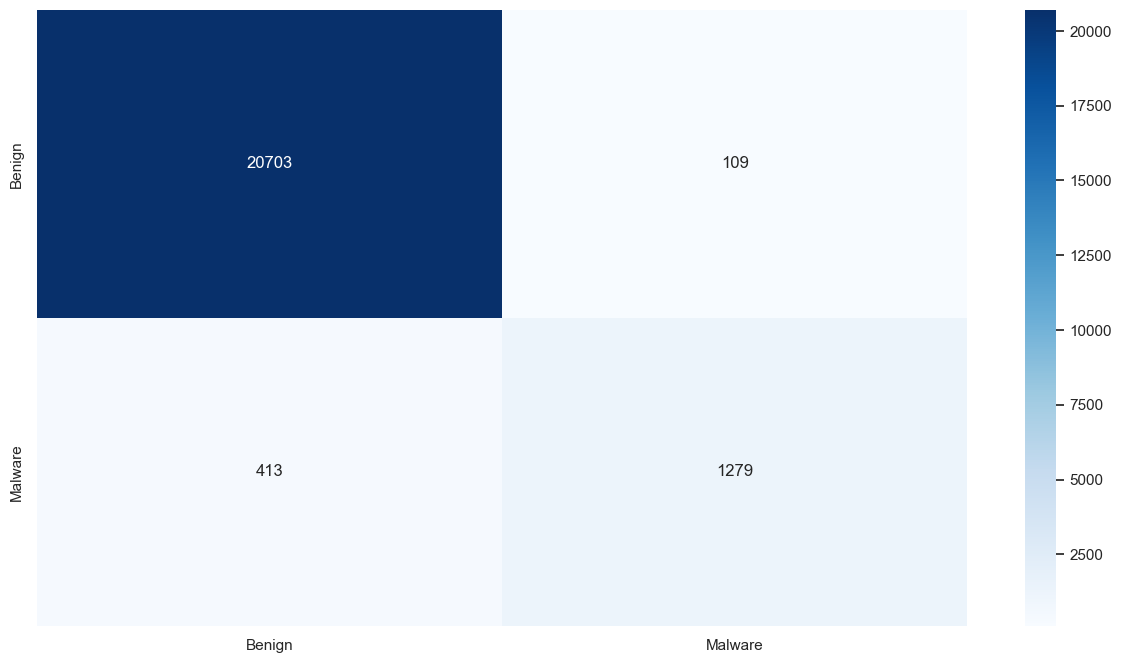

In [ ]:
show(dt)

In [ ]:
# AdaBoost is a popular ensemble method that works by combining the predictions of multiple weak learners.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

abc = AdaBoostClassifier()
abc_param = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    "learning_rate": [0.001, 0.01, 0.1, 1, 10, 100],
}
abc_gcv = create_grid_search(abc, abc_param)

In [ ]:
abc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
# plot_grid_search_results(abc_gcv.cv_results_)

In [ ]:
abc = abc_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/abc"+str(dataset_number)+"_model.sav"
pickle.dump(abc, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.97927   0.99438   0.98677     20812
     Malware    0.91466   0.74113   0.81881      1692

    accuracy                        0.97534     22504
   macro avg    0.94697   0.86776   0.90279     22504
weighted avg    0.97442   0.97534   0.97414     22504



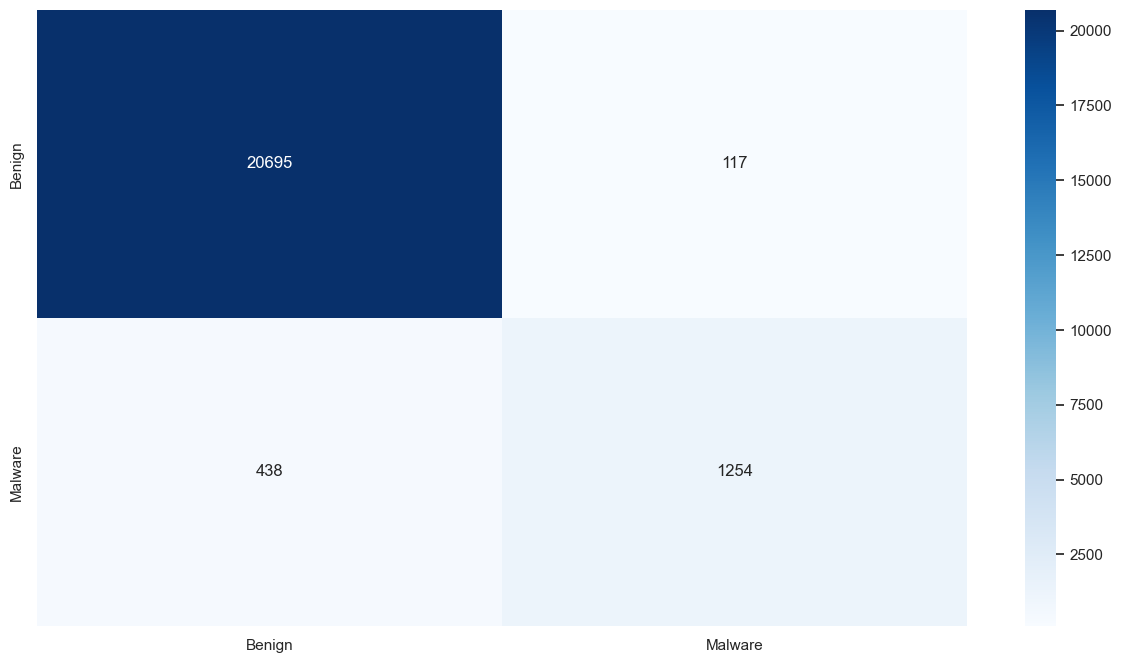

In [ ]:
show(abc)

In [ ]:
# Gradient Boosting is a popular ensemble method that works by combining the predictions of multiple weak learners.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

gbc = GradientBoostingClassifier()
gbc_param = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    "learning_rate": [0.001, 0.01, 0.1, 1, 10, 100],
}
gbc_gcv = create_grid_search(gbc, gbc_param)

In [ ]:
gbc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
# plot_grid_search_results(gbc_gcv.cv_results_)

In [ ]:
gbc = gbc_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/gbc"+str(dataset_number)+"_model.sav"
pickle.dump(gbc, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.97625   0.99741   0.98671     20812
     Malware    0.95649   0.70154   0.80941      1692

    accuracy                        0.97516     22504
   macro avg    0.96637   0.84947   0.89806     22504
weighted avg    0.97476   0.97516   0.97338     22504



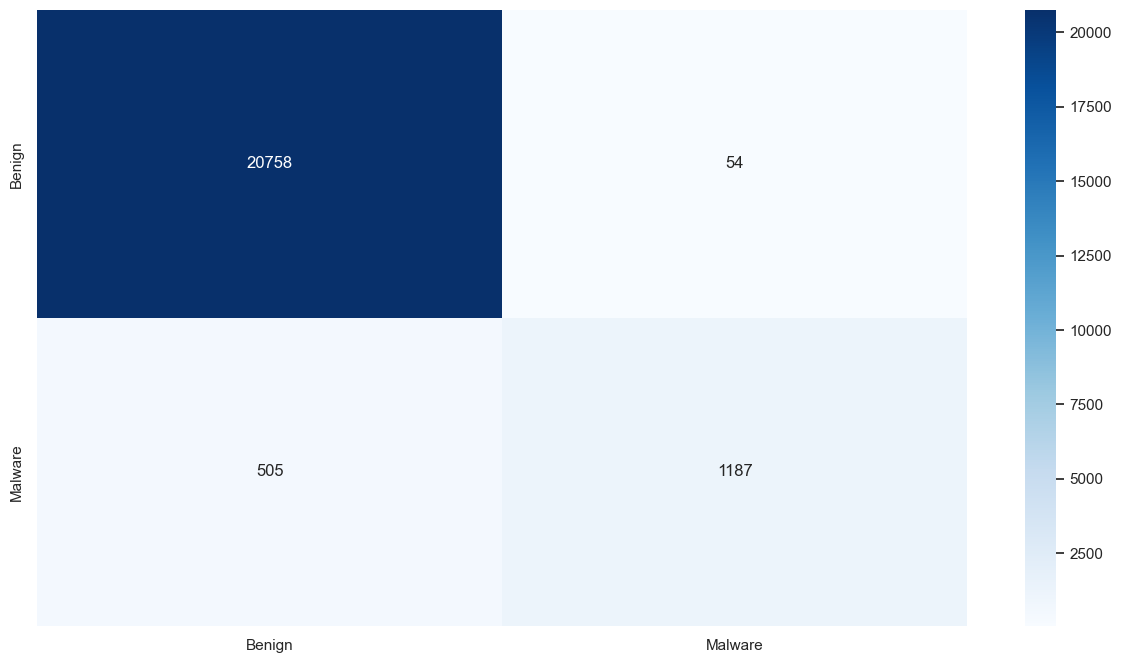

In [ ]:
show(gbc)

In [ ]:
# Neural networks are a popular choice for classification tasks.
# They work by learning the weights of the connections between neurons in the network.

mlp = MLPClassifier()
mlp_param = {
    "hidden_layer_sizes": [(100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100)],
    "activation": ["relu"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1],
    "learning_rate": ["constant", "invscaling", "adaptive"],
    "early_stopping": [True],
}
mlp_gcv = create_grid_search(mlp, mlp_param)

In [ ]:
mlp_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(100, 100, 100),
                                                (100, 100, 100, 100),
                                                (100, 100, 100, 100, 100)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['adam']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
# plot_grid_search_results(mlp_gcv.cv_results_)

In [ ]:
mlp = mlp_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/mlp1"+str(dataset_number)+"_model.sav"
pickle.dump(mlp, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.97475   0.99995   0.98719     20812
     Malware    0.99913   0.68144   0.81026      1692

    accuracy                        0.97600     22504
   macro avg    0.98694   0.84070   0.89873     22504
weighted avg    0.97659   0.97600   0.97389     22504



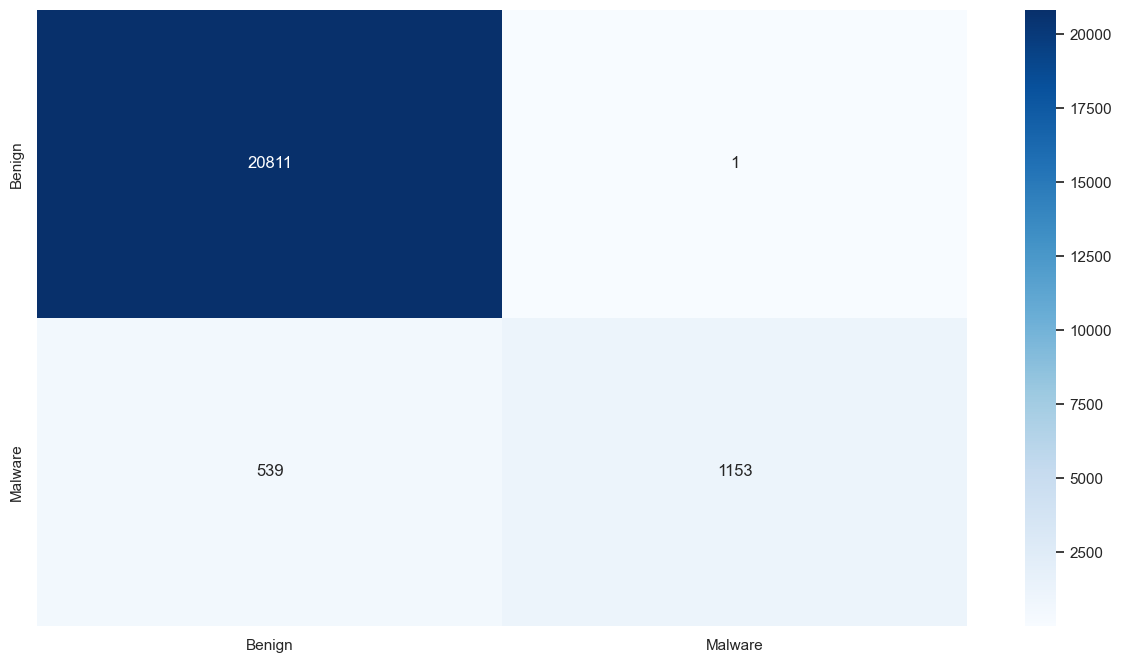

In [ ]:
show(mlp)

In [ ]:
# Voting classifier is a meta-classifier that combines the predictions of multiple classifiers.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

vc = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt), ('abc', abc), ('gbc', gbc), ('mlp', mlp)], voting='soft')
vc_param = {
    "weights": [[1, 1, 1, 1, 1, 1], [2, 1, 1, 1, 1, 1], [1, 2, 1, 1, 1, 1], [1, 1, 2, 1, 1, 1], [1, 1, 1, 2, 1, 1], [1, 1, 1, 1, 2, 1], [1, 1, 1, 1, 1, 2]],
}
vc_gcv = create_grid_search(vc, vc_param)

In [ ]:
vc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(C=1)),
                                                    ('knn',
                                                     KNeighborsClassifier(n_neighbors=9,
                                                                          weights='distance')),
                                                    ('dt',
                                                     DecisionTreeClassifier(max_depth=15,
                                                                            min_samples_split=7)),
                                                    ('abc',
                                                     AdaBoostClassifier(learning_rate=1,
                                                                        n_estimators=450)),
                                                    ('gbc',
                                                     GradientBoostingClassifier(n_estimators=200)),
                                                    ('mlp',
                                                     MLPClassifier(alpha=0.01,
                                                                   early_stopping=True,
                                                                   hidden_layer_sizes=(100,
                                                                                       100,
                                                                                       100,
                                                                                       100,
                                                                                       100),
                                                                   learning_rate='adaptive'))],
                                        voting='soft'),
             n_jobs=-1,
             param_grid={'weights': [[1, 1, 1, 1, 1, 1], [2, 1, 1, 1, 1, 1],
                                     [1, 2, 1, 1, 1, 1], [1, 1, 2, 1, 1, 1],
                                     [1, 1, 1, 2, 1, 1], [1, 1, 1, 1, 2, 1],
                                     [1, 1, 1, 1, 1, 2]]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
# plot_grid_search_results(vc_gcv.cv_results_)

In [ ]:
vc = vc_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/vc1"+str(dataset_number)+"_model.sav"
pickle.dump(vc, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.97621   0.99774   0.98686     20812
     Malware    0.96188   0.70095   0.81094      1692

    accuracy                        0.97543     22504
   macro avg    0.96905   0.84934   0.89890     22504
weighted avg    0.97513   0.97543   0.97363     22504



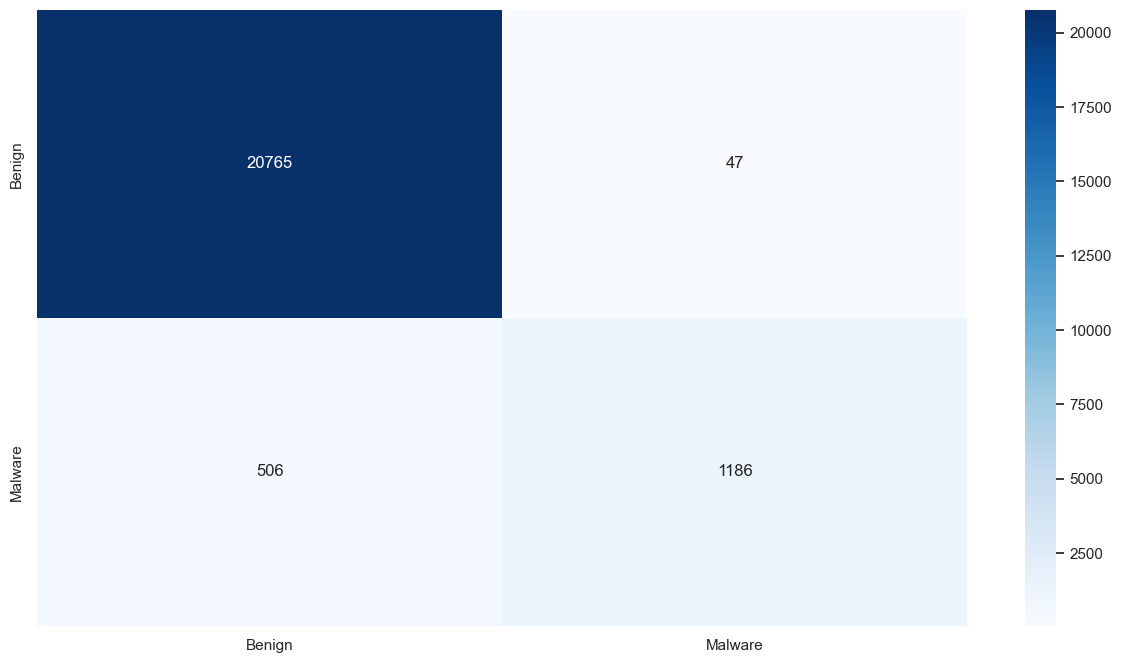

In [ ]:
show(vc)

In [ ]:
# Stacking classifier is a meta-classifier that combines the predictions of multiple classifiers.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

sc = StackingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt), ('abc', abc), ('gbc', gbc), ('mlp', mlp)], final_estimator=DecisionTreeClassifier())
sc_param = {
    "final_estimator__criterion": ["gini", "entropy"],
    "final_estimator__max_depth": [3, 5, 7, 9, 11, 13, 15],
    "final_estimator__min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
}
sc_gcv = create_grid_search(sc, sc_param)

In [ ]:
sc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 126 candidates, totalling 378 fits


GridSearchCV(cv=3,
             estimator=StackingClassifier(estimators=[('lr',
                                                       LogisticRegression(C=1)),
                                                      ('knn',
                                                       KNeighborsClassifier(n_neighbors=9,
                                                                            weights='distance')),
                                                      ('dt',
                                                       DecisionTreeClassifier(max_depth=15,
                                                                              min_samples_split=7)),
                                                      ('abc',
                                                       AdaBoostClassifier(learning_rate=1,
                                                                          n_estimators=450)),
                                                      ('gbc',
                                                       GradientBoostingClassifier(n_estimators=200)),
                                                      ('mlp',
                                                       MLPClassifie...
                                                                     early_stopping=True,
                                                                     hidden_layer_sizes=(100,
                                                                                         100,
                                                                                         100,
                                                                                         100,
                                                                                         100),
                                                                     learning_rate='adaptive'))],
                                          final_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'final_estimator__criterion': ['gini', 'entropy'],
                         'final_estimator__max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'final_estimator__min_samples_split': [2, 3, 4, 5, 6,
                                                                7, 8, 9, 10]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
# plot_grid_search_results(sc_gcv.cv_results_)

In [ ]:
sc = sc_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/sc1"+str(dataset_number)+"_model.sav"
pickle.dump(sc, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.97692   0.99865   0.98767     20812
     Malware    0.97722   0.70981   0.82232      1692

    accuracy                        0.97694     22504
   macro avg    0.97707   0.85423   0.90499     22504
weighted avg    0.97694   0.97694   0.97524     22504



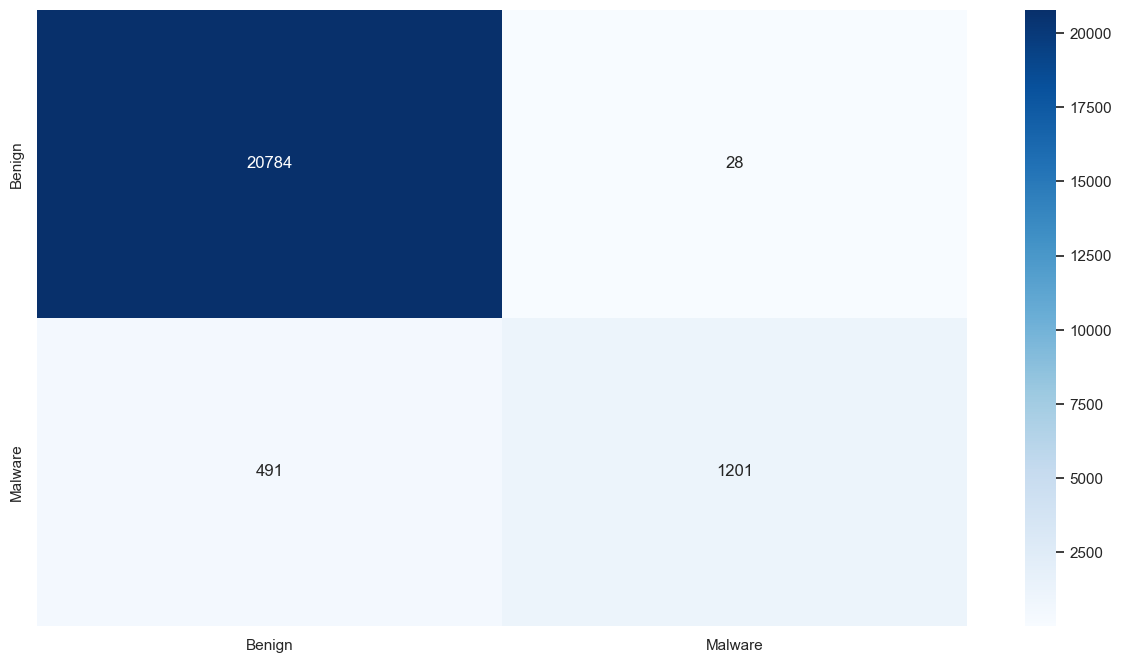

In [ ]:
show(sc)

In [ ]:
# Choose the best model

models = [lr, knn, dt, abc, gbc, mlp, vc, sc]
model_names = ["Logistic Regression", "K-Nearest Neighbors", "Decision Tree", "AdaBoost", "Gradient Boosting", "Neural Network", "Voting Classifier", "Stacking Classifier"]
model_scores = []

for model in models:
    predictions = model.predict(x_test_pca)
    true_labels = y_test
    model_report = classification_report(true_labels, predictions, digits=5)
    model_scores.append(model_report.split()[12])

best_model = models[model_scores.index(max(model_scores))]
best_model_name = model_names[model_scores.index(max(model_scores))]
best_model_score = max(model_scores)
print("Best model: " + best_model_name)
print("Score: " + str(best_model_score))
model_report = classification_report(true_labels, predictions, digits=5)
print(model_report)

Best model: Decision Tree
Score: 0.83052
              precision    recall  f1-score   support

      Benign    0.97692   0.99865   0.98767     20812
     Malware    0.97722   0.70981   0.82232      1692

    accuracy                        0.97694     22504
   macro avg    0.97707   0.85423   0.90499     22504
weighted avg    0.97694   0.97694   0.97524     22504



## Result printout

In [ ]:
def show(model):
    # We print our results
    sns.set(rc={'figure.figsize': (15, 8)})
    predictions = model.predict(x_test_pca)
    true_labels = y_test
    cf_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))

    # The heatmap is cool but this is the most important result
    print(model_report)

# Test

In [25]:
# Now it's your turn, use the model you have just created :)

# Read the valuation json, preprocess it and run your model
with open(f'./dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
test_df.fillna(' ', inplace=True)
test_df = vectorize_df(test_df)

# Load the model
filename = "Model/"+str(dataset_number)+"/vc"+str(dataset_number)+"_model.sav"
vc = pickle.load(open(filename, 'rb'))

# Predict with your model
X = test_df[features_list].to_numpy()
x_test_pca = pca.transform(X)
predictions = vc.predict(x_test_pca)

/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator LogisticRegression from version 1.2.0 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator KNeighborsClassifier from version 1.2.0 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.2.0 when using version 1.1.3. This might lead to breaking code or inval

# Save your predictions

In [45]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')